# Achievement 6.6_Sourcing & Analyzing Time Series Data

## Contents
- ###  Import Libraries
- ### Import & Review Data
- ### Clean and Prepare Data
- ### Group by Year
- ### Plot the Raw Time Series
- ### Decompose the Time Series
- ### Dickey-Fuller Test
- ### First Differencing
- ### Rerun Dickey-Fuller
- ### Stationarity Interpretation
- ### ACF Plot
- ### Autocorrelation Analysis
## Summary
- ### Key Findings
- ### Insights for Future Analysis

### Importing Libraries

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from datetime import datetime
from pylab import rcParams
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

### Import & Review Data

In [43]:
# Load the dataset
working_df = pd.read_csv(r'C:\Users\rewha\Achievement 6 Project\02_Data\02.02_Data Cleaned\Global_Cybersecurity_Threats_2015-2024-First_Pass.csv')

In [44]:
# Verify Data Structure
working_df.head()

,Unnamed: 0,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,2,India,2017,Man-In-The-Middle,It,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-State,Social Engineering,AI-based Detection,7
4,4,Germany,2018,Man-In-The-Middle,It,74.41,810682,Insider,Social Engineering,VPN,68


In [45]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           3000 non-null   int64  
 1   Country                              3000 non-null   object 
 2   Year                                 3000 non-null   int64  
 3   Attack Type                          3000 non-null   object 
 4   Target Industry                      3000 non-null   object 
 5   Financial Loss (in Million $)        3000 non-null   float64
 6   Number of Affected Users             3000 non-null   int64  
 7   Attack Source                        3000 non-null   object 
 8   Security Vulnerability Type          3000 non-null   object 
 9   Defense Mechanism Used               3000 non-null   object 
 10  Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(4), objec

### Clean and Prepare Data

In [46]:
# Dropping 'Unnamed: 0'
working_df.drop(columns=['Unnamed: 0'], inplace=True)

In [47]:
# Checking for duplicate rows
duplicates = working_df.duplicated()
print("Duplicate rows found:", duplicates.sum())

Duplicate rows found: 0


In [48]:
# Checking for empty cells
for col in working_df.select_dtypes(include='object').columns:
    empty_count = (working_df[col].str.strip() == '').sum()
    print(f"Empty strings in '{col}':", empty_count)

Empty strings in 'Country': 0
Empty strings in 'Attack Type': 0
Empty strings in 'Target Industry': 0
Empty strings in 'Attack Source': 0
Empty strings in 'Security Vulnerability Type': 0
Empty strings in 'Defense Mechanism Used': 0


### Group by Year

In [49]:
# Aggregate financial loss per year
ts_df = working_df.groupby("Year")["Financial Loss (in Million $)"].sum().reset_index()

In [50]:
# Rename column for clarity
ts_df.rename(columns={"Financial Loss (in Million $)": "Total Financial Loss"}, inplace=True)

In [51]:
# Preview
ts_df.head()

,Year,Total Financial Loss
0,2015,14510.21
1,2016,13947.26
2,2017,16261.68
3,2018,14720.48
4,2019,13134.69


In [52]:
# Create a datetime index using the Year
ts_df["Date"] = pd.to_datetime(ts_df["Year"].astype(str) + "-01-01")

In [53]:
# Set datetime as index and drop the original Year column
ts_df.set_index("Date", inplace=True)
ts_df.drop(columns=["Year"], inplace=True)

In [54]:
# Final shape check
ts_df.head()

,Total Financial Loss
Date,
2015-01-01,14510.21
2016-01-01,13947.26
2017-01-01,16261.68
2018-01-01,14720.48
2019-01-01,13134.69


### Plot the Raw Time Series

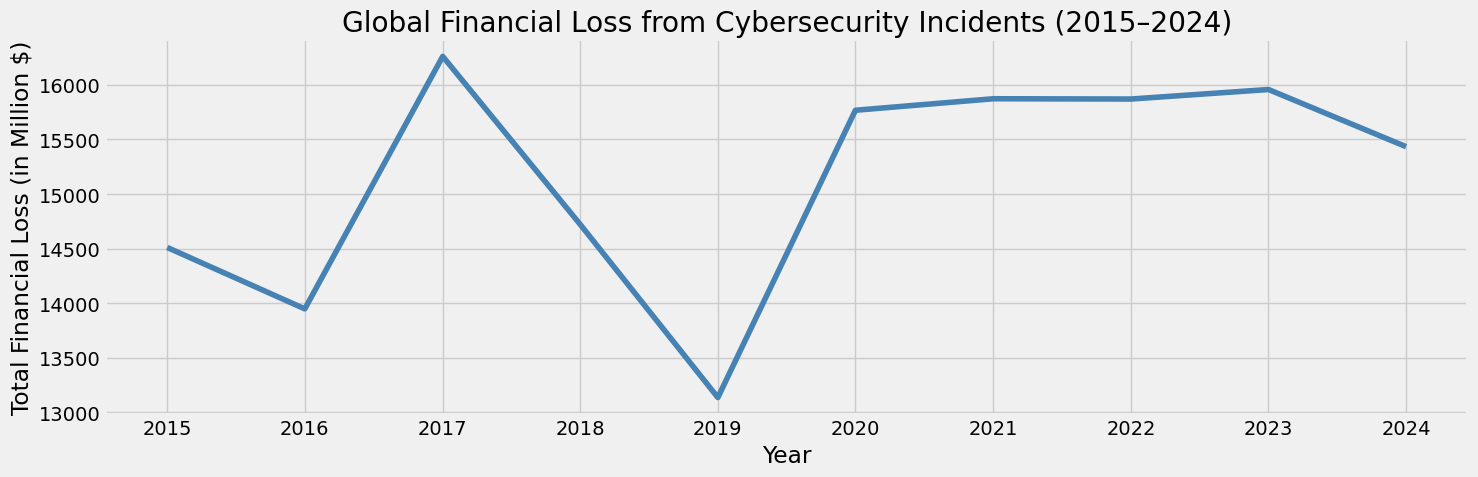

In [55]:
# Plot Total Financial Loss over time
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(ts_df, color='steelblue')
plt.title("Global Financial Loss from Cybersecurity Incidents (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Total Financial Loss (in Million $)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Decompose the Time Series

In [56]:
# Decompose using additive model
decomposition = seasonal_decompose(ts_df, model='additive', period=1)

In [57]:
# Set figure size
rcParams['figure.figsize'] = 18, 7

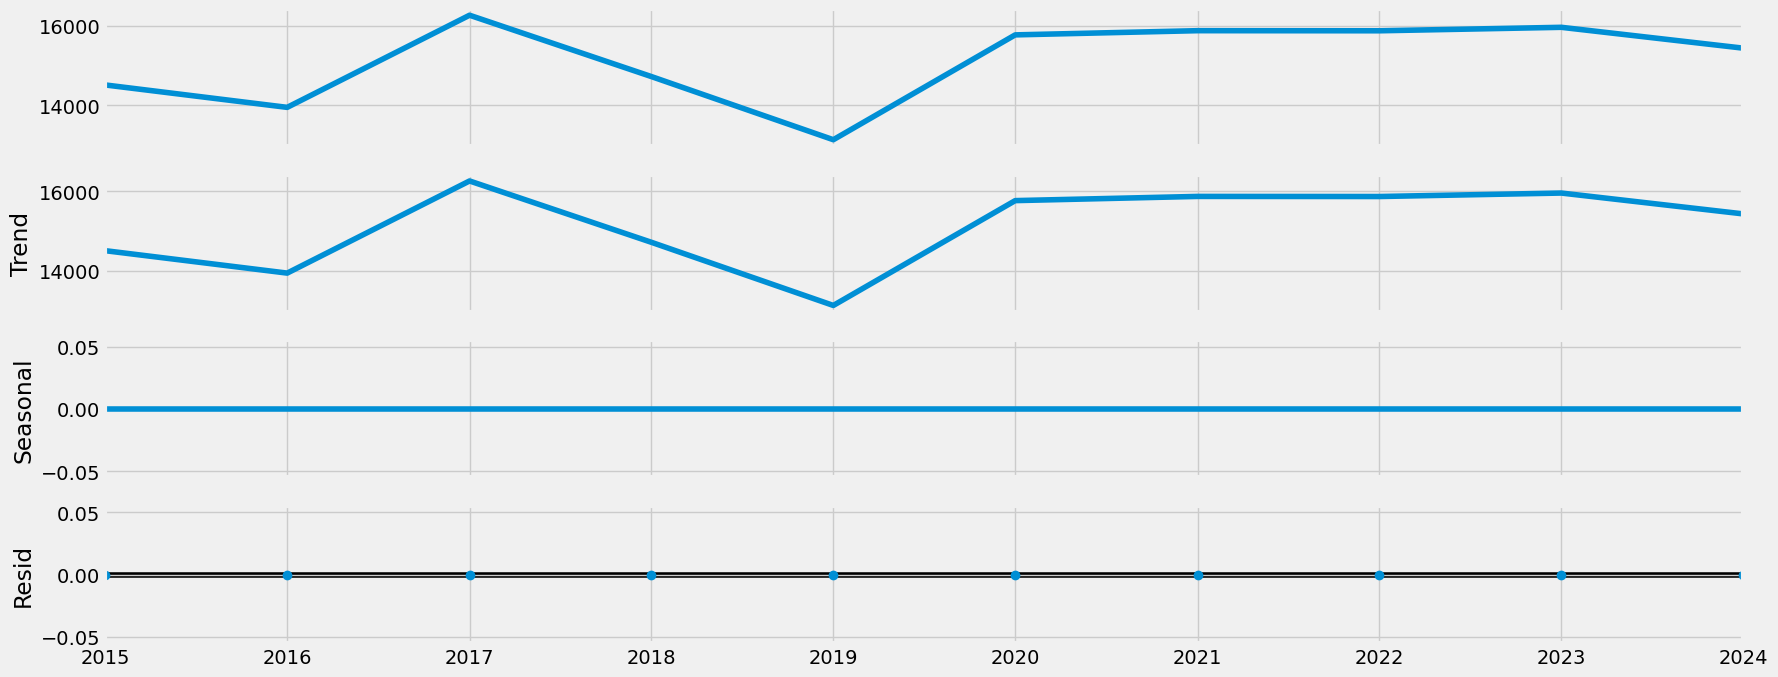

In [58]:
# Plot components
decomposition.plot()
plt.show()

#### Key Observations
- **Trend:**
	- The overall financial loss trend fluctuates slightly year to year, with minor declines between 2015–2016 and again from 2023–2024, and notable increases in 2017 and 2020. The plateau between 2020–2023 suggests a stabilization in average annual loss around \$16,000M.

- **Seasonality:**
	- There is **no seasonal pattern** in the data, which is expected given the **annual frequency** of the observations. Seasonal effects typically emerge in monthly or quarterly datasets.

- **Residuals:**
	- Residual values are flat at zero, indicating that **no unexplained variance** is present beyond the trend. This reinforces the simplicity of the annual dataset.

### Dickey-Fuller Test

In [59]:
# Run the Test on Series
dickey_fuller(ts_df['Total Financial Loss'])

Dickey-Fuller Stationarity Test:
Test Statistic                -2.592023
p-value                        0.094657
Number of Lags Used            0.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


#### Key Observations
- **Test Statistic:** -2.59
- **p-value:** 0.095
- **Critical Values:**
  - 1% = -4.47
  - 5% = -3.29
  - 10% = -2.77

- Since the **test statistic (-2.59) is higher than all critical values**, and the **p-value (0.095) is greater than 0.05**, we **fail to reject the null hypothesis**.
	- **NOTE:** The series is **not stationary** in its current form.

### First Differencing

In [60]:
# First differencing
ts_diff1 = ts_df.diff().dropna()

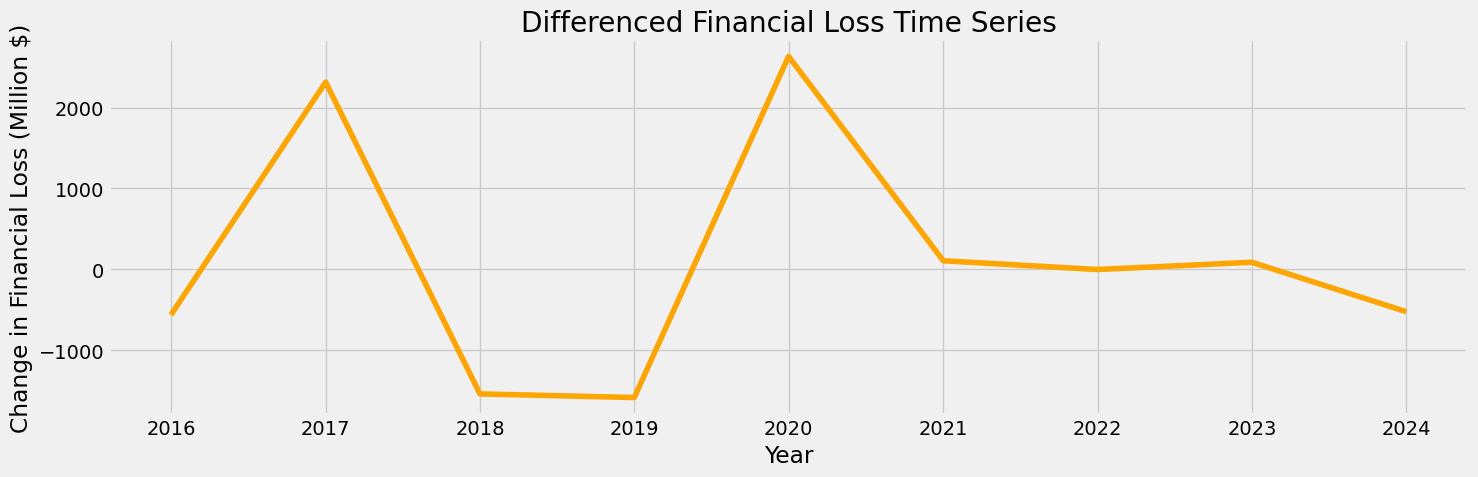

In [61]:
# Plot the differenced series
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(ts_diff1, color='orange')
plt.title("Differenced Financial Loss Time Series")
plt.xlabel("Year")
plt.ylabel("Change in Financial Loss (Million $)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Rerun Dickey-Fuller

In [62]:
dickey_fuller(ts_diff1['Total Financial Loss'])

Dickey-Fuller Stationarity Test:
Test Statistic                -4.217994
p-value                        0.000614
Number of Lags Used            1.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


#### Key Observations
- **Test Statistic:** -4.22
- **p-value:** 0.0006
- **Critical Values:**
  - 1% = -4.94
  - 5% = -3.48
  - 10% = -2.84

- The **test statistic is now lower than all critical values**, and the **p-value is well below 0.05**.
	- **NOTE:** The differenced series is now **stationary,** giving cause to **reject the null hypothesis.**

### Stationarity Interpretation

- After first-order differencing, the Dickey-Fuller test confirms that the series is now **stationary** (p-value = 0.0006). 
- This means that statistical forecasting models like ARIMA could be applied reliably in future analysis stages.
- The differencing removed long-term trends and stabilized the mean of the series.

### ACF Plot

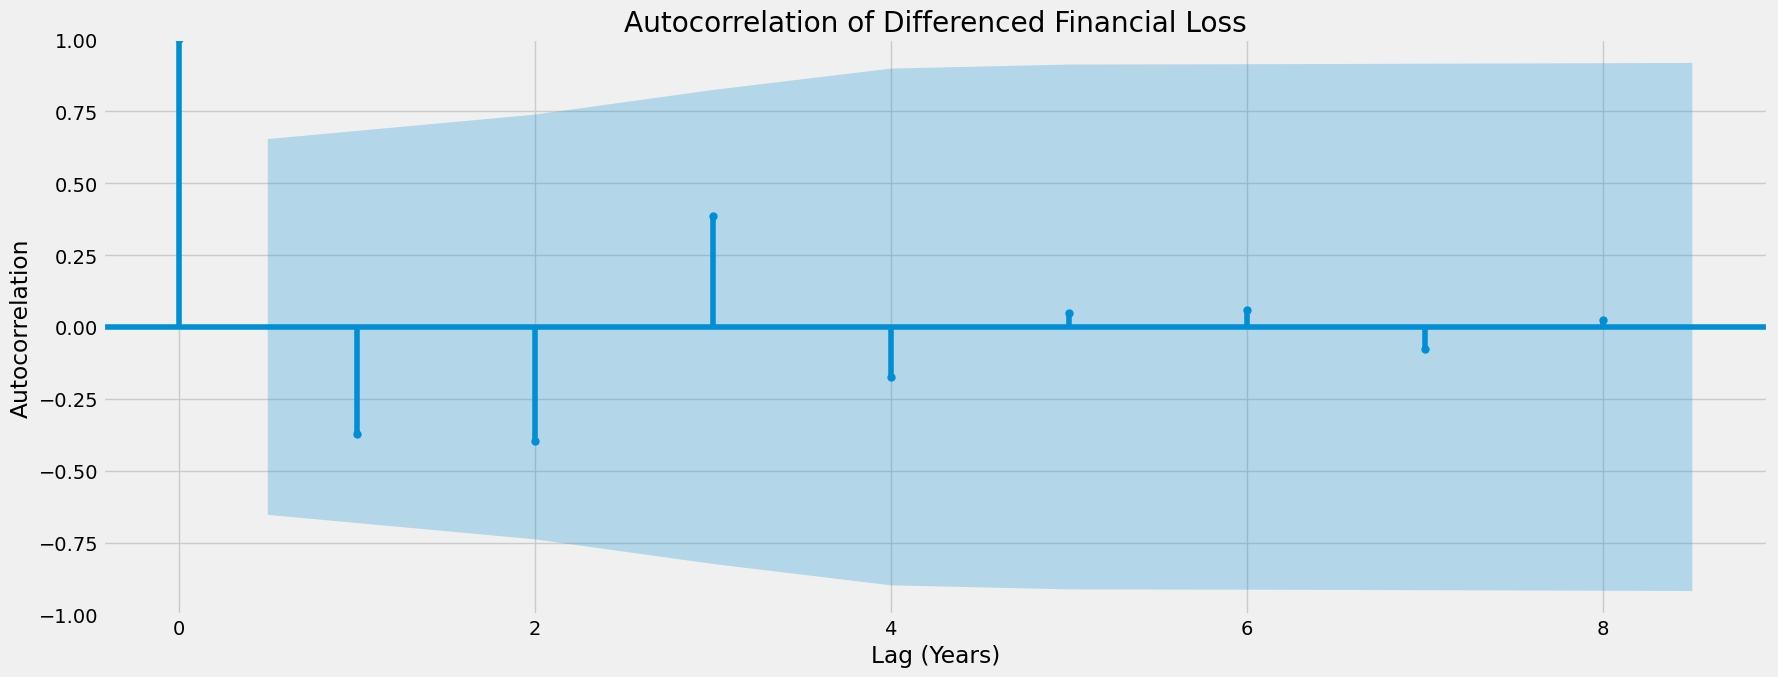

In [63]:
# Plot ACF of the stationary (differenced) series
plot_acf(ts_diff1['Total Financial Loss'], lags=8)
plt.title("Autocorrelation of Differenced Financial Loss")
plt.xlabel("Lag (Years)")
plt.ylabel("Autocorrelation")
plt.tight_layout()
plt.show()

### Autocorrelation Analysis

The autocorrelation plot of the **differenced time series** shows:
* A **strong negative autocorrelation at lag 1 and 2** (−0.35 and −0.40), which indicates that large increases in financial loss are often followed by large decreases (and vice versa).
* A **moderate positive spike at lag 3** (\~0.35), but still within confidence bands.
* All lags from 1 onward fall **within the 95% confidence interval**, meaning there is **no statistically significant autocorrelation** beyond immediate prior years.

**Interpretation:**
- While some minor short-term correlation exists, there's no evidence of **long-term seasonality or cyclical repetition**. 
- This reinforces our earlier finding that the data has **no strong seasonal or repeating structure,** and that the trend was the dominant component before differencing.

## Summary

- This time-series analysis explored trends in **global financial losses** due to cybersecurity incidents over the past decade. The data, aggregated annually, was drawn directly from the main dataset used throughout this project.

### Key Findings

- **Initial Trend**:
	- The raw time series revealed modest fluctuations in annual loss, with a plateau between 2020–2023 followed by a slight decline in 2024.

- **Decomposition**:
	- Seasonal and residual components were flat (as expected from annual data), confirming that **long-term trend** was the dominant characteristic.

- **Stationarity**:
	- The original series was **not stationary** (ADF p-value = 0.095). After applying **first-order differencing**, the ADF p-value dropped to 0.0006, confirming **stationarity**.

- **Autocorrelation**:
  - The ACF plot showed **weak short-term negative autocorrelation** at lags 1–2, and no statistically significant autocorrelations overall.
  - This supports the conclusion that **no cyclical or seasonal effects** exist in this dataset.

### Insights for Future Analysis

- The plateau in recent years may indicate **maturity in detection/response strategies**, or **data normalization** in reporting practices.
- With a stationary series in place, future modeling could involve **ARIMA or forecasting tools** to predict upcoming loss trends.
- Time-series behavior alone does **not appear strongly predictable**, reinforcing the importance of incorporating other factors like attack type, industry, or defense mechanism.